# Advent of Code 2017 - Day 3

In [1]:
input_value = 325489

## Part 1


$$
\begin{matrix}
37 & 36 & 35 & 34 & 33 & 32 & 31 \\
38 & 17 & 16 & 15 & 14 & 13 & 30 \\
39 & 18  & 5  & 4 & 3  & 12 & 29 \\
40 & 19  & 6 & \color{red}{1} & 2  & 11 & 28 \\
41 & 20  & 7 & 8 & \color{red}{9} & 10 & 27 \\
42 & 21 & 22 & 23 & 24 & \color{red}{25} & 26 \\
43 & 44 & 45 & 46 & 47 & 48 & \color{red}{49} & \cdots \\
\end{matrix}
$$


A naive solution will actually create a grid, but could understanding the pattern help us find the row and column given an index in $\Theta(1)$? I took inspiration from a similar problem I found on [Math Exchange](https://math.stackexchange.com/a/3158068).

First, we make the observation, all numbers from the origin (if $1$ is assigned to the origin) following the diagonal to southeast is the sequence of odd squares (we have not proven this) $1, 9, 25, 49, 81, \cdots$:

$$
f_n = (2n-1)^2
$$

and $f_n$ is located at the coordinates $(\frac{(n + 1)}{2} - 1, -(\frac{(n + 1)}{2} - 1))$ or more simply at:

$$
(\frac{n-1}{2}, \frac{1-n}{2})
$$

A proof for our claim that the number in the diagonal from origin in the southeast direction are odd squares could possibly be sketched by examining the number of items in concentric "rings".


Given that we want to find coordinates $(x(n), y(n))$ of the $n$th element, we can define $\hat{n}$ to be the largest odd square that is less than or equal to $n$:

$$
\hat n=\max(\{2k - 1 \mid (2k - 1)^2\leqslant n\})
$$

The above can be reduced to:

$$
\hat n=\left\{
\begin{array}{cl}
\lfloor \sqrt n\rfloor - 1 & \mbox{if $\lfloor \sqrt n\rfloor$ is even}\\
\lfloor \sqrt n\rfloor & \mbox{if $\lfloor \sqrt n\rfloor$ is odd}
\end{array}
\right.
$$

The number $n$ exists in the part of spiral following $\hat{n}$ all the way but not including $(\hat{n} + 1)^2$. We can visualize this by going back to the grid of numbers:

$$
\begin{matrix}
\color{red}{\hat{n}^2 + 2\hat{n} + 2} & & & & & \color{red}{\cdots} & & & & & & \color{red}{\hat{n}^2 + \hat{n} + 1} \\
\color{red}{\hat{n}^2 + 2\hat{n} + 3} & \ddots & & & & & & & & & & \color{red}{\hat{n}^2 + \hat{n}} \\
& & 37 & 36 & 35 & 34 & 33 & 32 & 31 \\
\color{red}{\vdots} & & 38 & 17 & 16 & 15 & 14 & 13 & 30 & & & \color{red}{\vdots} \\
& & 39 & 18  & 5  & 4 & 3  & 12 & 29 \\
& & 40 & 19  & 6 & 1 & 2  & 11 & 28 & & & \color{red}{\hat{n}^2 + \frac{\hat{n} + 1}{2}} \\
& & 41 & 20  & 7 & 8 & 9 & 10 & 27 \\
\color{red}{\vdots} & & 42 & 21 & 22 & 23 & 24 & 25 & 26 & & & \color{red}{\vdots} \\
& & 43 & 44 & 45 & 46 & 47 & 48 & 49 \\
& & & & & & & & & \ddots & & \color{red}{\hat{n}^2 + 2} \\
\color{red}{\hat{n}^2 + 3\hat{n} + 2} & & & & & & & & & & \color{red}{\hat{n}^2} &\color{red}{\hat{n}^2 + 1} \\
\color{red}{\hat{n}^2 + 3\hat{n} + 3} & & & & & \color{red}{\cdots} & & & & & \color{red}{\hat{n}^2 + 4n + 3} & \hat{n}^2 + 4n + 4 & \\

\end{matrix}
$$

We can then construct rules for assigning coordinates based on the value of $n$:

$$
(x(n),y(n))= 
\left\{
\begin{array}{cl}

(\frac{\hat{n} - 1}{2}, \frac{1-\hat{n}}{2}) & \mbox{if $\hat n^2 = n$}\\

(\frac{\hat{n} - 1}{2} + 1, \frac{1-\hat{n}}{2} + (n-\hat{n}^2 - 1)) & \mbox{if $\hat n^2 + 1 \leqslant n \leqslant \hat n^2 + \hat n$}\\

(\frac{\hat{n} - 1}{2} + 1 + (n-\hat{n}^2 - \hat{n}-1), \frac{1-\hat{n}}{2} + \hat{n}) & \mbox{if $\hat n^2+\hat n< n\leqslant\hat n^2+2\hat n+1$}\\



(\frac{(1-\hat{n})}{2} - 1, \frac{\hat{n}-1}{2} + 1 - (n - \hat{n}^2 - 2\hat{n} - 2)) & \mbox{if $\hat n^2+2\hat n+1< n\leqslant\hat n^2+3\hat n+2$}\\


(\frac{1-\hat{n}}{2} + 1 + (n - \hat{n}^2 - 3 \hat{n} - 3), \frac{1-\hat{n}}{2} - 1) & \mbox{if $\hat n^2+3\hat n+2< n\leqslant\hat n^2+4\hat n+3$}
\end{array}
\right..
$$

In [2]:
import math
n = 325489

def find_coordinates(n):
  n_hat = math.floor(math.sqrt(n)) - 1 if math.floor(math.sqrt(n)) % 2 == 0 else math.floor(math.sqrt(n)) 

  coordinates = None

  if (n_hat ** 2) == n:
    #print('Case 0')
    coordinates = ((n_hat - 1) / 2, (1 - n_hat) / 2)

  elif (n_hat ** 2) <= n and n <= (n_hat ** 2) + n_hat:
    #print('Case 1')
    coordinates = ((n_hat - 1) / 2 + 1, (1 - n_hat) / 2 + (n- n_hat**2 - 1))

  elif (n_hat ** 2) + n_hat < n and n <= (n_hat ** 2) + 2 * n_hat + 1:
    #print('Case 2')
    coordinates = ((n_hat - 1) / 2 + 1 - (n - n_hat ** 2 - n_hat - 1), (1 - n_hat) / 2 + n_hat)

  elif (n_hat ** 2) + 2 * n_hat + 1 < n and n <= (n_hat ** 2) + 3 * n_hat + 2:
    #print('Case 3')
    coordinates = ((1-n_hat) / 2 - 1, (n_hat - 1) / 2 + 1 - (n - n_hat ** 2-2*n_hat - 2))

  elif (n_hat ** 2) + 3 * n_hat + 2 < n and n <= (n_hat ** 2) + 4 * n_hat + 3:
    #print('Case 4')
    coordinates = ((1-n_hat) / 2 - 1 + (n-n_hat ** 2 - 3 * n_hat - 3), (1-n_hat) / 2 - 1)

  return coordinates

coordinates = find_coordinates(input_value)
manhattan_distance = abs(coordinates[0]) + abs(coordinates[1])
print(coordinates, manhattan_distance)

(-267.0, -285.0) 552.0


That's works amazingly! Let's see if we can visualize it.

(-5.5, 5.5, -5.5, 5.5)

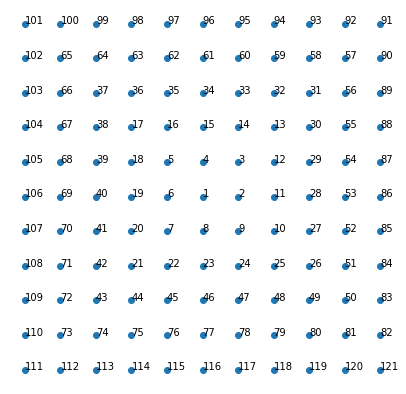

In [3]:
import matplotlib.pyplot as plt

xs = []
ys = []

for n in range(1, 11 ** 2 + 1):
  x, y = find_coordinates(n)
  xs.append(x)
  ys.append(y)

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(xs, ys)
for i, (x, y) in enumerate(zip(xs, ys)):
  ax.annotate(i + 1, (x, y))
plt.axis('off')


## Part 2


In [4]:
def find_neighbors(coordinates):

  def of_bucket(buckets):
    for bucket_item in buckets[0]:
      if len(buckets) > 1 :
        for result in of_bucket(buckets[1:]):
          yield [bucket_item] + result
      else:
        yield [bucket_item]

  buckets = [[coord - 1, coord, coord + 1] for coord in coordinates]
  neighbor_locations = [tuple(comb) for comb in of_bucket(buckets) if tuple(comb) != coordinates]

  return neighbor_locations

In [5]:
map = {}
map[(0, 0)] = 1
sequence = [1]
counter = 2
while(True):

  coordinates = find_coordinates(counter)
  neighbors = find_neighbors(coordinates)

  sum_prev = 0
  for neighbor in neighbors:
    if neighbor in map:
      sum_prev += map[neighbor]

  map[coordinates] = sum_prev
  sequence.append(sum_prev)

  counter += 1

  if sum_prev > input_value:
    print(sum_prev)
    break


330785


Someone on [Reddit](https://www.reddit.com/r/adventofcode/comments/7h7ufl/2017_day_3_solutions/dqovogc?utm_source=share&utm_medium=web2x&context=3) noticed that this sequence was on the [The On-Line Encyclopedia of Integer Sequences](https://oeis.org/A141481) (OEIS). This answer matches the one we found.



In [6]:
data = []
with open('b141481.txt', 'r') as f:
  for line in f:
    data.append(line.strip())

sequence = [int(x.split()[1]) for x in data[2: -7]]
for x in sequence:
  if x > input_value:
    print(x)
    break

330785
